<a href="https://colab.research.google.com/gist/sudoevans/1f7ff044ee151165cf6111cfdf6dee05/project-com404.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rationale

Breast cancer is the most common cancer in women. Early diagnosis of breast tumors as non-cancerous (benign) or cancerous (malignant) is very important for good outcomes. However, diagnosis by doctors can be subjective and inconsistent.

Machine learning models can be trained to predict if breast tumors are cancerous based on tumor cell features. This analysis aims to apply machine learning to diagnose breast cancer using the Breast Cancer Wisconsin dataset. This data has cell measurements that classify tumors. We test 4 common machine learning models - KNN, SVM, Decision Tree, and Random Forest. The model with the best accuracy can correctly diagnose cancer and provide rationale for using machine learning for breast cancer screening. Accurate prediction can assist doctors and detect cancer earlier to save lives.

In [27]:
# Import  libraries for our Tasks
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

## Tasks

In [2]:
# a) Load the data
!apt-get install unzip
! unzip archive.zip -d dataset #Unzipping
df = pd.read_csv('dataset/data.csv') #  actual loading

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Archive:  archive.zip
replace dataset/data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: dataset/data.csv        


In [3]:
# b) Display the data frame information
print(df.info())
# c) Display the first and last tuples of the data set
df.head()
df.tail()
# d) Display the descriptive statistics
df.info()
# e) Display the class label distribution
print(df['diagnosis'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

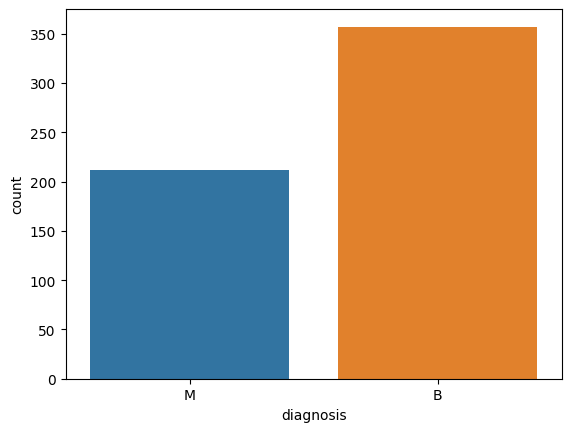

In [23]:
# f) Use seaborn to display count plot for the class label
sns.countplot(x='diagnosis', data=df)
plt.show()


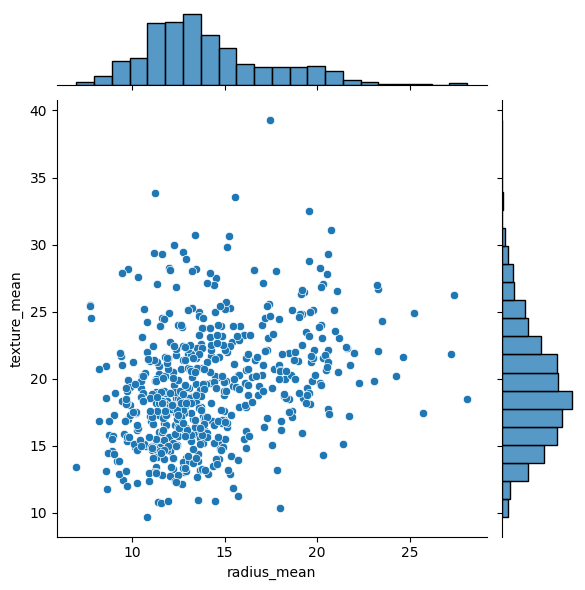

In [24]:
# g) Use seaborn to display a joint plot with any two variables of your choice.
sns.jointplot(x='radius_mean', y='texture_mean', data=df)
plt.show()

h. Determine based in the data set, whether you want to use category encoders

No need to use category encoders based on the data types and content.

In [5]:
# i) Split the data such that 25% is reserved testing
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# j) Show the shape of training set and the test set
print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)

Training shape: (426, 30) (426,)
Testing shape: (143, 30) (143,)


In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   
Unnamed: 32                   NaN          NaN           NaN             NaN   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
con

<ipython-input-10-a5ba1d5825cb>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True, cmap ="YlOrBr")


<Axes: >

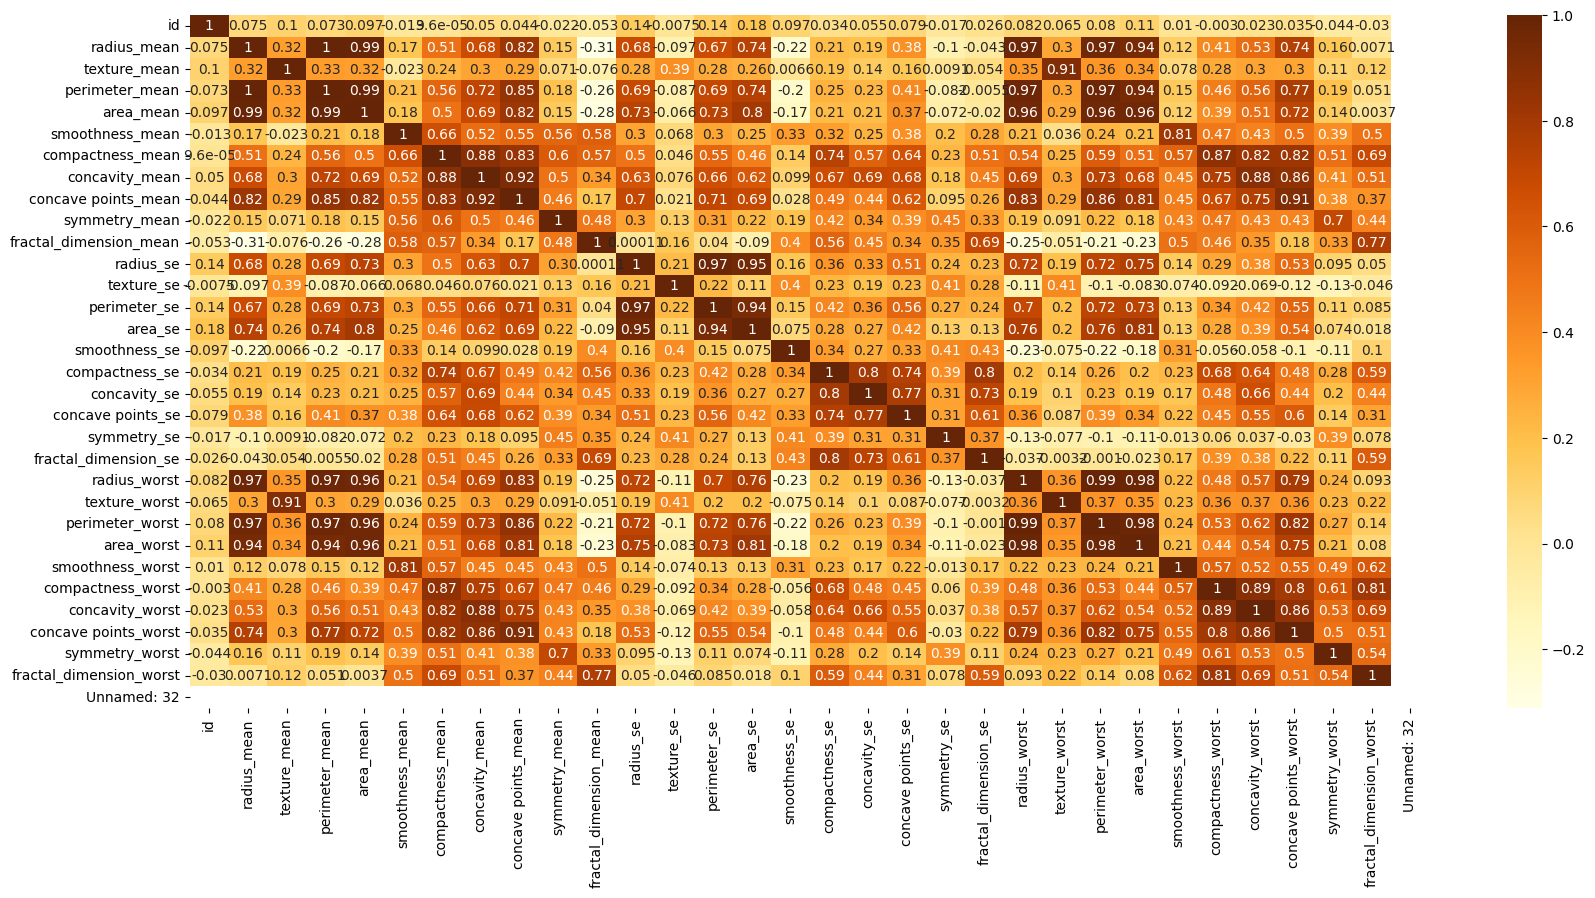

In [10]:
plt.figure(figsize=(20,9))


#Correlation Heatmap
sns.heatmap(df.corr(),annot = True, cmap ="YlOrBr")

<Axes: xlabel='smoothness_mean', ylabel='perimeter_mean'>

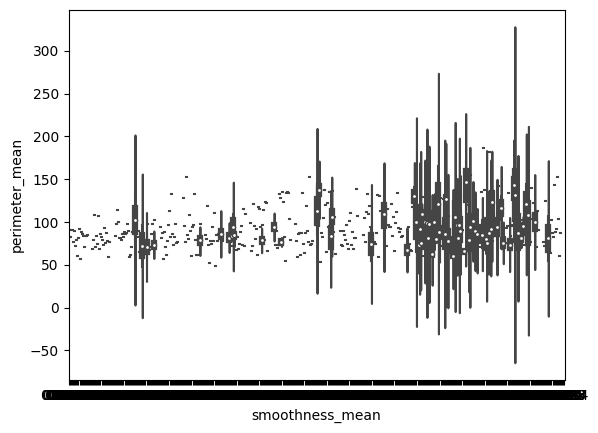

In [33]:
# How smooth is Our Data?
# Lets find out with a violin Plot

sns.violinplot(x="smoothness_mean",y="perimeter_mean",data=df)

## KNN

Confusion Matrix (K-NN):
[[88  1]
 [ 4 50]]


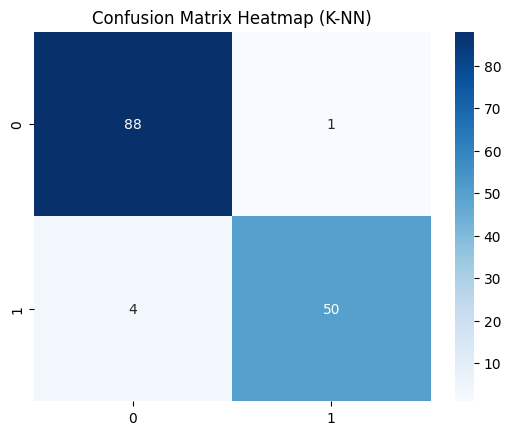

Classification Accuracy (K-NN): 0.965034965034965
Training Accuracy (K-NN): 0.9342723004694836
Testing Accuracy (K-NN): 0.965034965034965


In [6]:
# Train a model using K-NN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Show the confusion matrix
knn_pred = knn_model.predict(X_test)
knn_cm = confusion_matrix(y_test, knn_pred)
print("Confusion Matrix (K-NN):")
print(knn_cm)

# Show the heat map
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Heatmap (K-NN)")
plt.show()

# Show the classification accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Classification Accuracy (K-NN):", knn_accuracy)

# Compare the training and testing accuracy
print("Training Accuracy (K-NN):", knn_model.score(X_train, y_train))
print("Testing Accuracy (K-NN):", knn_accuracy)


## SVM -Training Model using SVM

In [14]:
# SVM Model
svm = SVC()
svm.fit(X_train, y_train)


SVC()

SVM Training Accuracy: 0.911
SVM Test Accuracy: 0.951
SVM Confusion Matrix:
[[88  1]
 [ 6 48]]


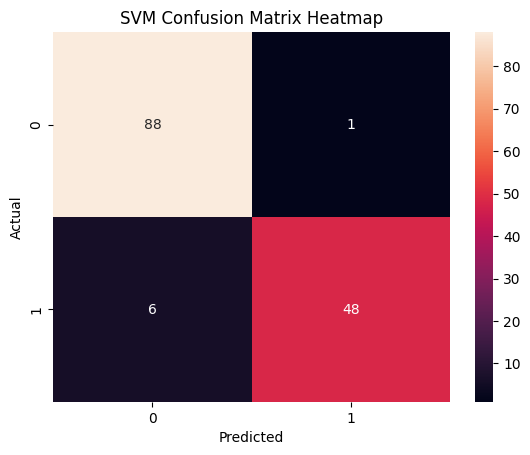

SVM Training Accuracy: 0.911
SVM Test Accuracy: 0.951


In [15]:

# Training accuracy
svm_train_acc = svm.score(X_train, y_train)
print(f'SVM Training Accuracy: {svm_train_acc:.3f}')

# Testing accuracy
svm_test_acc = svm.score(X_test, y_test)
print(f'SVM Test Accuracy: {svm_test_acc:.3f}')

# Predictions on test set
y_pred = svm.predict(X_test)

# Confusion matrix
svm_cm = confusion_matrix(y_test, y_pred)
print('SVM Confusion Matrix:')
print(svm_cm)

# Heatmap visualization of confusion matrix
sns.heatmap(svm_cm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Compare training accuracy vs testing accuracy
print(f'SVM Training Accuracy: {svm_train_acc:.3f}')
print(f'SVM Test Accuracy: {svm_test_acc:.3f}')

## Decision Trees



In [17]:
# Decision Tree Model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Training accuracy
dt_train_acc = dt.score(X_train, y_train)
print(f'Decision Tree Training Accuracy: {dt_train_acc:.3f}')

# Testing accuracy
dt_test_acc = dt.score(X_test, y_test)
print(f'Decision Tree Test Accuracy: {dt_test_acc:.3f}')

# Predictions on test set
y_pred = dt.predict(X_test)

# Confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
print('Decision Tree Confusion Matrix:')
print(dt_cm)


Decision Tree Training Accuracy: 1.000
Decision Tree Test Accuracy: 0.930
Decision Tree Confusion Matrix:
[[82  7]
 [ 3 51]]


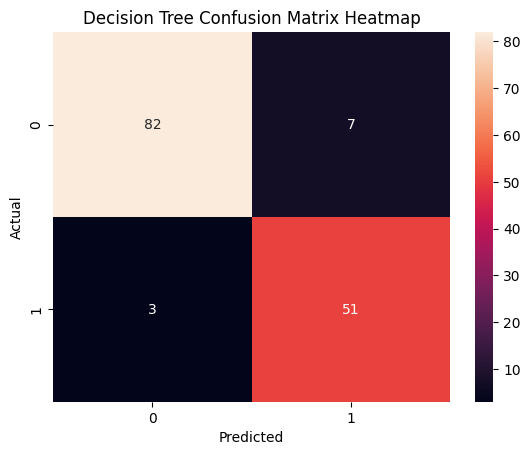

In [18]:
# Heatmap visualization
sns.heatmap(dt_cm, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Random Forest model training, evaluation, and comparison

In [19]:
# Random Forest Model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Training accuracy
rf_train_acc = rf.score(X_train, y_train)
print(f'RF Training Accuracy: {rf_train_acc:.3f}')

# Testing accuracy
rf_test_acc = rf.score(X_test, y_test)
print(f'RF Test Accuracy: {rf_test_acc:.3f}')

# Predictions on test set
y_pred = rf.predict(X_test)

# Confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
print('Random Forest Confusion Matrix:')
print(rf_cm)


RF Training Accuracy: 1.000
RF Test Accuracy: 0.972
Random Forest Confusion Matrix:
[[88  1]
 [ 3 51]]


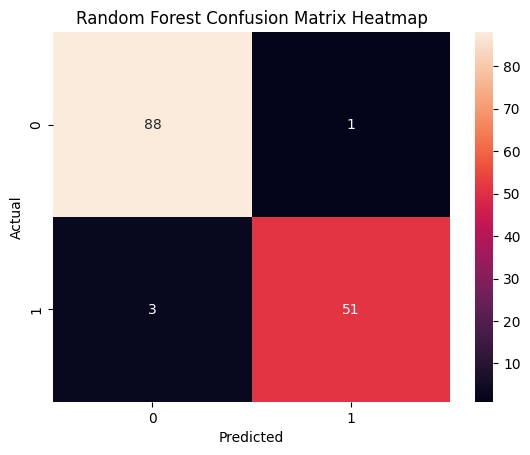

In [20]:
# Heatmap visualization
sns.heatmap(rf_cm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
# Compare training vs testing accuracy
print(f'RF Training Accuracy: {rf_train_acc:.3f}')
print(f'RF Test Accuracy: {rf_test_acc:.3f}')

RF Training Accuracy: 1.000
RF Test Accuracy: 0.972


## Comparisions- The best Model


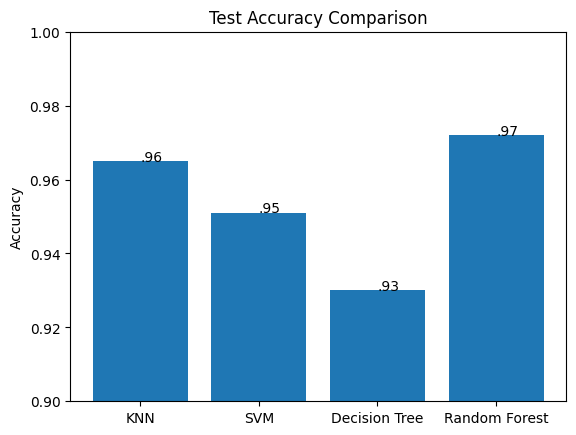

In [30]:
# Assigning Variables
knn_test_acc = knn_accuracy
svm_test_acc = svm_test_acc
dt_test_acc = dt_test_acc
rf_test_acc = rf_test_acc

# Plot for comparison
algorithms = ['KNN', 'SVM', 'Decision Tree', 'Random Forest']
accuracies = [knn_test_acc, svm_test_acc, dt_test_acc, rf_test_acc]

plt.bar(algorithms, accuracies)
plt.title('Test Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1) # zoomed-in y-axis scale

for i in range(len(algorithms)):
    plt.text(i, accuracies[i], str(accuracies[i])[1:4])

plt.show()